In [6]:
import pydgn
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import os.path as osp
import pandas as pd
sns.color_palette("colorblind", as_cmap=True)
sns.set_palette("colorblind")

In [7]:
data_root = 'DATA'
dataset_name = 'NCI1'
exp_folder = f'GSPN_RESULTS/SUPERVISED/supervised_gspn_classification_chemical_{dataset_name}/MODEL_ASSESSMENT/'

outer_fold = 1
outer_folder = osp.join(exp_folder, f'OUTER_FOLD_{outer_fold}')
ms_folder = osp.join(outer_folder, 'MODEL_SELECTION')

# config_id = 15  # best config for the unsupervised part according to regression task
# config_folder = osp.join(ms_folder, f'config_{config_id}')

# model_config_file = osp.join(config_folder, 'config_results.json')
# config = json.load(open(model_config_file, 'r'))['config']
# results = json.load(open(model_config_file, 'r'))
# print(json.dumps(results, indent=4))

In [8]:
df = pd.DataFrame(columns=['outer_fold', 
                          'num_mixtures',
                          'num_graph_mixtures',
                          'num_layers',
                          'global_readout',
                          'avg_validation_score'])

for outer_fold in range(1, 11):
    outer_folder = osp.join(exp_folder, f'OUTER_FOLD_{outer_fold}')
    ms_folder = osp.join(outer_folder, 'MODEL_SELECTION')
    for d in os.listdir(ms_folder):
        if os.path.isfile(osp.join(ms_folder, d)):
            continue

        config_folder = osp.join(ms_folder, d)
        model_config_file = osp.join(config_folder, 'config_results.json')
        config = json.load(open(model_config_file, 'r'))['config']
        results = json.load(open(model_config_file, 'r'))

        num_mixtures = config['supervised_config']['num_mixtures']
        num_graph_mixtures = config['supervised_config']['num_graph_mixtures']

        num_layers = config['supervised_config']['num_layers']
        global_readout = config['supervised_config']['global_readout']

        vl_score = results['avg_validation_score']

        df = df.append({'outer_fold' : outer_fold,
                        'num_mixtures' : num_mixtures,
                        'num_graph_mixtures' : num_graph_mixtures,
                        'num_layers' : num_layers,
                        'global_readout' : global_readout,
                        'avg_validation_score' : vl_score},                       
                        ignore_index=True)
df

,outer_fold,num_mixtures,num_graph_mixtures,num_layers,global_readout,avg_validation_score
0,1,20,32,20,mean,74.864868
1,1,20,128,10,mean,75.675674
2,1,20,32,5,sum,78.648651
3,1,20,32,5,mean,73.243240
4,1,40,32,5,sum,76.486488
...,...,...,...,...,...,...
235,10,40,128,10,mean,75.135132
236,10,20,128,20,mean,73.243240
237,10,20,128,5,sum,73.783783
238,10,40,128,20,mean,78.378380


In [9]:
df_gb = df.groupby(by=['num_mixtures',
               'num_graph_mixtures',
               'num_layers',
               'global_readout'], as_index=False).mean()
print(df_gb)

    num_mixtures  num_graph_mixtures  num_layers global_readout  \
0             20                  32           5           mean   
1             20                  32           5            sum   
2             20                  32          10           mean   
3             20                  32          10            sum   
4             20                  32          20           mean   
5             20                  32          20            sum   
6             20                 128           5           mean   
7             20                 128           5            sum   
8             20                 128          10           mean   
9             20                 128          10            sum   
10            20                 128          20           mean   
11            20                 128          20            sum   
12            40                  32           5           mean   
13            40                  32           5            su

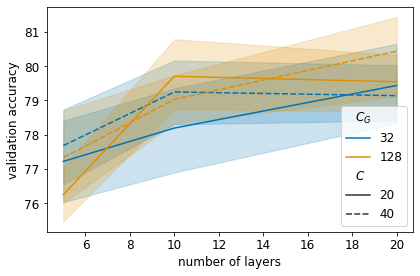

In [13]:
if not os.path.exists('plots'):
    os.makedirs('plots')
    
plt.rcParams.update({'font.size': 12})

renamed_df = df.rename(columns={'num_graph_mixtures': r'$C_G$', 'num_mixtures': r'$C$'})
sns.lineplot(x='num_layers', 
             y='avg_validation_score', 
             hue=r'$C_G$', 
             style=r'$C$', 
             data=renamed_df[renamed_df['global_readout'] == 'sum'],
             palette=sns.color_palette('colorblind', n_colors=2))
plt.xlabel('number of layers')
plt.ylabel('validation accuracy')
plt.tight_layout()
plt.savefig('plots/layers_vs_perf.pdf')